In [17]:
import pandas as pd
import seaborn as sns

In [18]:
tips = sns.load_dataset('tips')
tips.head(2)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3


In [19]:
#1. 컬럼의 이름변경 ->['총금액', '팁', '성별', '흡연여부','요일','시간','인원']
#2.총금액, 팁 컬럼의 데이터를 소수점 첫째자리까지 유지, 반올림
#3.식사인원, 성별에따라(그룹화), 팁의 비율의 평균값을 구하고 시각화(바형그래프)

In [20]:
tips.columns = ['총금액','팁', '성별', '흡연여부','요일','시간','인원' ] #colums 은 리스트의 형태니까 []의 형태로 바로 바꿔주면됨
tips.head()

,총금액,팁,성별,흡연여부,요일,시간,인원
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [24]:
#case1
#round(tips['총 금액'],1)

#반올림 
tips[['총금액','팁']] = tips[['총금액','팁']].round(1) 
#꼭 앞에 넣어줘야함 데이터 변경된것 저장할때

tips.head(2)

,총금액,팁,성별,흡연여부,요일,시간,인원
0,17.0,1.0,Female,No,Sun,Dinner,2
1,10.3,1.7,Male,No,Sun,Dinner,3


In [25]:
# 팁비율 = (팁 / 총금액) *100
tips['팁'] / tips['총금액'] *100

0       5.882353
1      16.504854
2      16.666667
3      13.924051
4      14.634146
         ...    
239    20.344828
240     7.352941
241     8.810573
242    10.112360
243    15.957447
Length: 244, dtype: float64

In [26]:
tips['팁비율'] = tips['팁'] / tips['총금액'] *100

In [36]:
tips.groupby(['인원','성별']).mean()['팁비율']

C:\Users\kyu11\AppData\Local\Temp\ipykernel_16268\2017577899.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tips.groupby(['인원','성별']).mean()['팁비율']


인원  성별    
1   Male      22.093023
    Female    21.322912
2   Male      16.273796
    Female    17.053626
3   Male      14.763093
    Female    16.025679
4   Male      15.017047
    Female    13.267871
5   Male      13.371547
    Female    17.114094
6   Male      14.953486
    Female    16.306239
Name: 팁비율, dtype: float64

In [37]:
group_data =tips.groupby(['인원','성별']).mean()['팁비율']

C:\Users\kyu11\AppData\Local\Temp\ipykernel_16268\1192307291.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  group_data =tips.groupby(['인원','성별']).mean()['팁비율']


<Axes: ylabel='인원,성별'>

C:\Users\kyu11\AppData\Roaming\Python\Python311\site-packages\IPython\core\events.py:89: UserWarning: Glyph 51064 (\N{HANGUL SYLLABLE IN}) missing from current font.
  func(*args, **kwargs)
C:\Users\kyu11\AppData\Roaming\Python\Python311\site-packages\IPython\core\events.py:89: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  func(*args, **kwargs)
C:\Users\kyu11\AppData\Roaming\Python\Python311\site-packages\IPython\core\events.py:89: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from current font.
  func(*args, **kwargs)
C:\Users\kyu11\AppData\Roaming\Python\Python311\site-packages\IPython\core\events.py:89: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from current font.
  func(*args, **kwargs)
C:\Users\kyu11\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51064 (\N{HANGUL SYLLABLE IN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\kyu11\AppD

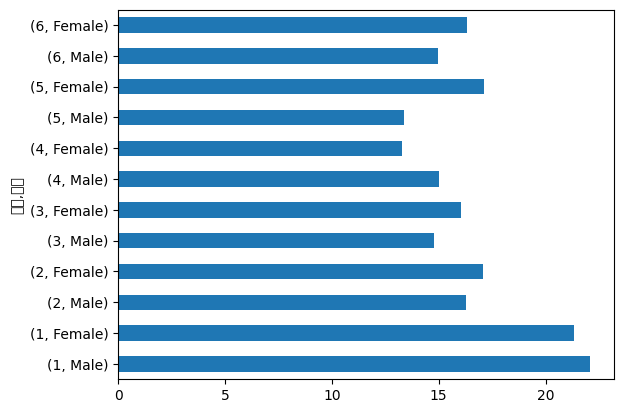

In [39]:
group_data.plot.barh() #간단하게 시각화